In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter

In [2]:
# Variables
start_date = '1928-01-01'
end_date = '2023-07-01'
ticker_symbol = '^GSPC'
start_month = 6
end_month = 7
vertical_line_date = '2023-06-30'

In [3]:
# Data acquisition and processing
sp500 = yf.download(ticker_symbol, start=start_date, end=end_date)
sp500 = sp500.reset_index()

sp500['Prev_Close'] = sp500.groupby(sp500.Date.dt.year)['Close'].shift()
sp500['Return'] = (sp500['Close'] - sp500['Prev_Close']) / sp500['Prev_Close'] * 100

sp500['Month'] = sp500['Date'].dt.month
sp500['Day'] = sp500['Date'].dt.day

sp500_june_july = sp500[(sp500['Month'] >= start_month) & (sp500['Month'] <= end_month)]

avg_returns = sp500_june_july.groupby(['Month', 'Day'])['Return'].mean().reset_index()

avg_returns['Date'] = pd.to_datetime('2023-' + avg_returns['Month'].astype(str) + '-' + avg_returns['Day'].astype(str))
avg_returns = avg_returns.sort_values('Date')

[*********************100%***********************]  1 of 1 completed


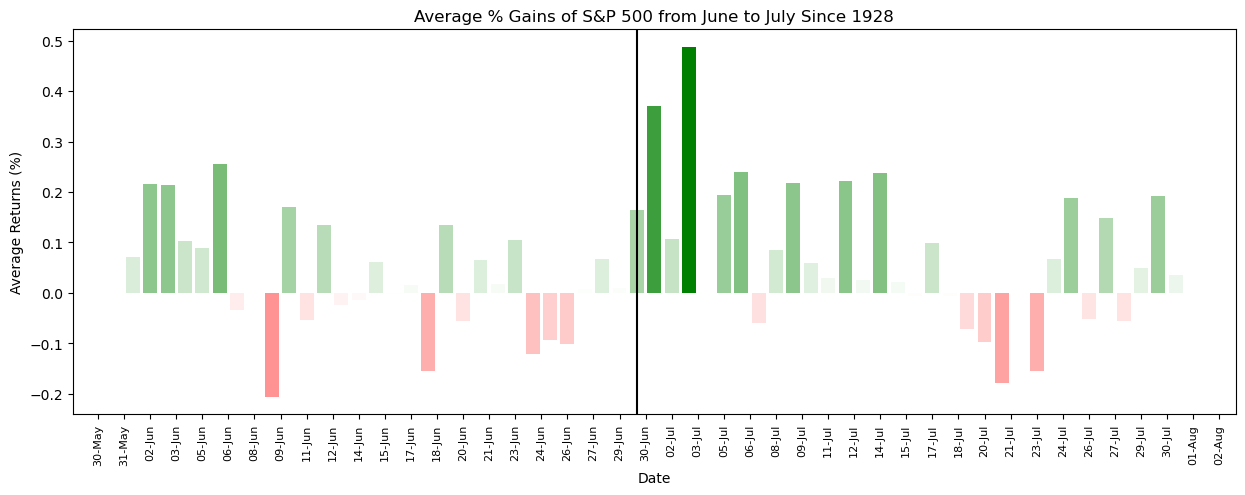

In [5]:
# Plotting
vmax = avg_returns['Return'].abs().max()
cmap = colors.LinearSegmentedColormap.from_list("", ["red","white","green"])
norm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

fig, ax = plt.subplots(figsize=(15, 5))

bar = ax.bar(avg_returns['Date'], avg_returns['Return'], color=cmap(norm(avg_returns['Return'].values)))

ax.axvline(pd.to_datetime(vertical_line_date), color='black')

ax.set_xlabel('Date')
ax.set_ylabel('Average Returns (%)')
ax.set_title('Average % Gains of S&P 500 from {} to {} Since 1928'.format(
    pd.to_datetime('2023-' + str(start_month) + '-01').strftime('%B'), 
    pd.to_datetime('2023-' + str(end_month) + '-01').strftime('%B')))

ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=len(avg_returns['Date'])))
date_format = DateFormatter("%d-%b")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=90, fontsize=8)

plt.show()
